In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [3]:
imb_2019 = pd.read_csv('../data/imbalance_1h_2019.csv')
imb_2019

,timestamp,imbalance_price
0,2019-01-01 00:00:00,-329.604500
1,2019-01-01 01:00:00,-283.800000
2,2019-01-01 02:00:00,-334.717000
3,2019-01-01 03:00:00,117.666500
4,2019-01-01 04:00:00,-323.315000
...,...,...
20419,2021-04-30 19:00:00,-11.115500
20420,2021-04-30 20:00:00,293.269000
20421,2021-04-30 21:00:00,190.205000
20422,2021-04-30 22:00:00,147.016714


In [4]:
imb_2019 = imb_2019.rename(columns={'timestamp': 'ds', 'imbalance_price': 'y'})
imb_2019

,ds,y
0,2019-01-01 00:00:00,-329.604500
1,2019-01-01 01:00:00,-283.800000
2,2019-01-01 02:00:00,-334.717000
3,2019-01-01 03:00:00,117.666500
4,2019-01-01 04:00:00,-323.315000
...,...,...
20419,2021-04-30 19:00:00,-11.115500
20420,2021-04-30 20:00:00,293.269000
20421,2021-04-30 21:00:00,190.205000
20422,2021-04-30 22:00:00,147.016714


In [5]:
def train_test_split(df):
    n = int(len(df)*0.7)
    train, test = df.iloc[:n], df.iloc[n:]

    return train,test

In [6]:
train_2019, test_2019 = train_test_split(imb_2019)

In [7]:
#for i in range(len(test_2019)):
forecasts = []
for i in range(24):
    m = Prophet()
    m.fit(train_2019.iloc[:-(25-i),:]) 
    future = m.make_future_dataframe(periods=1)
    forecast = m.predict(future)
    print(forecast.iloc[0])
    forecasts.append(forecast.iloc[0])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -232.605
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       21492.1    0.00487049       111.234      0.8435      0.8435      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       21498.6    0.00774526       209.406           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       21501.6   9.28632e-05       94.2019   4.472e-07       0.001      362  LS failed, Hessian reset 
     299       21501.9    6.5727e-05       51.2026           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       21502.3   0.000128045       129.726    2.04e-06       0.001      532  LS failed, Hessian reset 
     399       21502.4   3.85692e-05       71.4488           1           1      583   
    Iter      log pro

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  156.962114
yhat_lower                            -515.379192
yhat_upper                             751.322744
trend_lower                            156.962114
trend_upper                            156.962114
additive_terms                          -2.339674
additive_terms_lower                    -2.339674
additive_terms_upper                    -2.339674
daily                                  -17.745856
daily_lower                            -17.745856
daily_upper                            -17.745856
weekly                                  15.406182
weekly_lower                            15.406182
weekly_upper                            15.406182
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   154.622439
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  170.837263
yhat_lower                            -476.199594
yhat_upper                             778.318843
trend_lower                            170.837263
trend_upper                            170.837263
additive_terms                          -2.218367
additive_terms_lower                    -2.218367
additive_terms_upper                    -2.218367
daily                                  -17.840833
daily_lower                            -17.840833
daily_upper                            -17.840833
weekly                                  15.622466
weekly_lower                            15.622466
weekly_upper                            15.622466
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   168.618896
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  156.596422
yhat_lower                             -460.49859
yhat_upper                             787.460339
trend_lower                            156.596422
trend_upper                            156.596422
additive_terms                          -2.168245
additive_terms_lower                    -2.168245
additive_terms_upper                    -2.168245
daily                                  -17.849915
daily_lower                            -17.849915
daily_upper                            -17.849915
weekly                                   15.68167
weekly_lower                             15.68167
weekly_upper                             15.68167
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   154.428177
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  171.497732
yhat_lower                            -419.366155
yhat_upper                             804.249262
trend_lower                            171.497732
trend_upper                            171.497732
additive_terms                          -2.101133
additive_terms_lower                    -2.101133
additive_terms_upper                    -2.101133
daily                                  -17.851837
daily_lower                            -17.851837
daily_upper                            -17.851837
weekly                                  15.750704
weekly_lower                            15.750704
weekly_upper                            15.750704
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                     169.3966
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  178.834466
yhat_lower                             -444.79593
yhat_upper                             779.079217
trend_lower                            178.834466
trend_upper                            178.834466
additive_terms                          -2.205773
additive_terms_lower                    -2.205773
additive_terms_upper                    -2.205773
daily                                  -17.860002
daily_lower                            -17.860002
daily_upper                            -17.860002
weekly                                  15.654229
weekly_lower                            15.654229
weekly_upper                            15.654229
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   176.628693
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  179.649882
yhat_lower                            -436.352247
yhat_upper                             755.273016
trend_lower                            179.649882
trend_upper                            179.649882
additive_terms                          -2.049369
additive_terms_lower                    -2.049369
additive_terms_upper                    -2.049369
daily                                  -17.915272
daily_lower                            -17.915272
daily_upper                            -17.915272
weekly                                  15.865902
weekly_lower                            15.865902
weekly_upper                            15.865902
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   177.600513
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  165.659826
yhat_lower                            -433.746457
yhat_upper                             795.423456
trend_lower                            165.659826
trend_upper                            165.659826
additive_terms                          -2.022013
additive_terms_lower                    -2.022013
additive_terms_upper                    -2.022013
daily                                  -17.897386
daily_lower                            -17.897386
daily_upper                            -17.897386
weekly                                  15.875373
weekly_lower                            15.875373
weekly_upper                            15.875373
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   163.637813
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  171.909927
yhat_lower                             -460.27579
yhat_upper                             772.404973
trend_lower                            171.909927
trend_upper                            171.909927
additive_terms                          -2.025315
additive_terms_lower                    -2.025315
additive_terms_upper                    -2.025315
daily                                  -17.919503
daily_lower                            -17.919503
daily_upper                            -17.919503
weekly                                  15.894188
weekly_lower                            15.894188
weekly_upper                            15.894188
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   169.884612
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  175.718256
yhat_lower                            -452.958232
yhat_upper                             761.369145
trend_lower                            175.718256
trend_upper                            175.718256
additive_terms                          -2.103065
additive_terms_lower                    -2.103065
additive_terms_upper                    -2.103065
daily                                  -17.934005
daily_lower                            -17.934005
daily_upper                            -17.934005
weekly                                   15.83094
weekly_lower                             15.83094
weekly_upper                             15.83094
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   173.615191
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                   177.75172
yhat_lower                            -433.266109
yhat_upper                             826.698565
trend_lower                             177.75172
trend_upper                             177.75172
additive_terms                          -2.441271
additive_terms_lower                    -2.441271
additive_terms_upper                    -2.441271
daily                                  -18.105046
daily_lower                            -18.105046
daily_upper                            -18.105046
weekly                                  15.663774
weekly_lower                            15.663774
weekly_upper                            15.663774
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   175.310449
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  189.111111
yhat_lower                            -428.613842
yhat_upper                             770.543558
trend_lower                            189.111111
trend_upper                            189.111111
additive_terms                          -2.691581
additive_terms_lower                    -2.691581
additive_terms_upper                    -2.691581
daily                                  -18.243578
daily_lower                            -18.243578
daily_upper                            -18.243578
weekly                                  15.551997
weekly_lower                            15.551997
weekly_upper                            15.551997
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                    186.41953
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  146.928907
yhat_lower                            -468.177022
yhat_upper                             729.765412
trend_lower                            146.928907
trend_upper                            146.928907
additive_terms                          -2.988854
additive_terms_lower                    -2.988854
additive_terms_upper                    -2.988854
daily                                   -18.39402
daily_lower                             -18.39402
daily_upper                             -18.39402
weekly                                  15.405166
weekly_lower                            15.405166
weekly_upper                            15.405166
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   143.940053
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  159.457342
yhat_lower                            -463.095242
yhat_upper                             715.483956
trend_lower                            159.457342
trend_upper                            159.457342
additive_terms                          -3.202039
additive_terms_lower                    -3.202039
additive_terms_upper                    -3.202039
daily                                  -18.470338
daily_lower                            -18.470338
daily_upper                            -18.470338
weekly                                  15.268299
weekly_lower                            15.268299
weekly_upper                            15.268299
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   156.255303
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  157.965846
yhat_lower                            -420.866645
yhat_upper                             789.565027
trend_lower                            157.965846
trend_upper                            157.965846
additive_terms                          -3.221198
additive_terms_lower                    -3.221198
additive_terms_upper                    -3.221198
daily                                  -18.453904
daily_lower                            -18.453904
daily_upper                            -18.453904
weekly                                  15.232706
weekly_lower                            15.232706
weekly_upper                            15.232706
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   154.744648
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  172.767545
yhat_lower                            -428.985054
yhat_upper                             822.604664
trend_lower                            172.767545
trend_upper                            172.767545
additive_terms                          -3.220171
additive_terms_lower                    -3.220171
additive_terms_upper                    -3.220171
daily                                  -18.482482
daily_lower                            -18.482482
daily_upper                            -18.482482
weekly                                  15.262312
weekly_lower                            15.262312
weekly_upper                            15.262312
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   169.547374
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  186.496579
yhat_lower                            -452.613907
yhat_upper                             765.772125
trend_lower                            186.496579
trend_upper                            186.496579
additive_terms                           -3.22975
additive_terms_lower                     -3.22975
additive_terms_upper                     -3.22975
daily                                  -18.492316
daily_lower                            -18.492316
daily_upper                            -18.492316
weekly                                  15.262566
weekly_lower                            15.262566
weekly_upper                            15.262566
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   183.266829
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  171.487769
yhat_lower                            -469.793651
yhat_upper                             769.169993
trend_lower                            171.487769
trend_upper                            171.487769
additive_terms                          -3.247766
additive_terms_lower                    -3.247766
additive_terms_upper                    -3.247766
daily                                   -18.48756
daily_lower                             -18.48756
daily_upper                             -18.48756
weekly                                  15.239794
weekly_lower                            15.239794
weekly_upper                            15.239794
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   168.240003
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  168.416256
yhat_lower                             -418.56382
yhat_upper                             772.272976
trend_lower                            168.416256
trend_upper                            168.416256
additive_terms                          -3.506024
additive_terms_lower                    -3.506024
additive_terms_upper                    -3.506024
daily                                  -18.494384
daily_lower                            -18.494384
daily_upper                            -18.494384
weekly                                   14.98836
weekly_lower                             14.98836
weekly_upper                             14.98836
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   164.910232
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  175.155121
yhat_lower                            -460.057406
yhat_upper                             803.001901
trend_lower                            175.155121
trend_upper                            175.155121
additive_terms                           -3.66224
additive_terms_lower                     -3.66224
additive_terms_upper                     -3.66224
daily                                  -18.451878
daily_lower                            -18.451878
daily_upper                            -18.451878
weekly                                  14.789638
weekly_lower                            14.789638
weekly_upper                            14.789638
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   171.492881
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  182.425272
yhat_lower                            -466.206405
yhat_upper                              824.24345
trend_lower                            182.425272
trend_upper                            182.425272
additive_terms                          -3.691599
additive_terms_lower                    -3.691599
additive_terms_upper                    -3.691599
daily                                  -18.436213
daily_lower                            -18.436213
daily_upper                            -18.436213
weekly                                  14.744614
weekly_lower                            14.744614
weekly_upper                            14.744614
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   178.733673
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  170.242757
yhat_lower                            -453.816521
yhat_upper                             749.185254
trend_lower                            170.242757
trend_upper                            170.242757
additive_terms                          -3.621608
additive_terms_lower                    -3.621608
additive_terms_upper                    -3.621608
daily                                  -18.493676
daily_lower                            -18.493676
daily_upper                            -18.493676
weekly                                  14.872068
weekly_lower                            14.872068
weekly_upper                            14.872068
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                    166.62115
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                   172.86547
yhat_lower                            -460.230737
yhat_upper                             768.482786
trend_lower                             172.86547
trend_upper                             172.86547
additive_terms                          -3.670559
additive_terms_lower                    -3.670559
additive_terms_upper                    -3.670559
daily                                  -18.466966
daily_lower                            -18.466966
daily_upper                            -18.466966
weekly                                  14.796407
weekly_lower                            14.796407
weekly_upper                            14.796407
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   169.194911
Name: 0, dtype: object
Initial log joint probabili

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds                            2019-01-01 00:00:00
trend                                  162.901811
yhat_lower                            -418.177516
yhat_upper                              758.29905
trend_lower                            162.901811
trend_upper                            162.901811
additive_terms                          -3.679593
additive_terms_lower                    -3.679593
additive_terms_upper                    -3.679593
daily                                  -18.478706
daily_lower                            -18.478706
daily_upper                            -18.478706
weekly                                  14.799113
weekly_lower                            14.799113
weekly_upper                            14.799113
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   159.222218
Name: 0, dtype: object
Initial log joint probabili

In [8]:
forecasts[:][-1]

ds                            2019-01-01 00:00:00
trend                                  152.006002
yhat_lower                            -486.957795
yhat_upper                             759.909308
trend_lower                            152.006002
trend_upper                            152.006002
additive_terms                          -3.648642
additive_terms_lower                    -3.648642
additive_terms_upper                    -3.648642
daily                                  -18.479712
daily_lower                            -18.479712
daily_upper                            -18.479712
weekly                                  14.831069
weekly_lower                            14.831069
weekly_upper                            14.831069
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                    148.35736
Name: 0, dtype: object

In [9]:
yhats = []
for i in forecasts:
    yhats.append(i[-1])

In [10]:
forecast_1h_df = train_2019.iloc[-25:-1]
forecast_1h_df['predicted'] = np.array(yhats)

/var/folders/l1/s0yq7dwn0bb9pl6j4h0s86840000gn/T/ipykernel_12064/2882670811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1h_df['predicted'] = np.array(yhats)


In [11]:
forecast_1h_df

,ds,y,predicted
14271,2020-08-17 15:00:00,766.6790,154.622439
14272,2020-08-17 16:00:00,331.3475,168.618896
14273,2020-08-17 17:00:00,369.1855,154.428177
14274,2020-08-17 18:00:00,-68.6675,169.396600
14275,2020-08-17 19:00:00,644.5335,176.628693
14276,2020-08-17 20:00:00,71.0485,177.600513
14277,2020-08-17 21:00:00,174.4305,163.637813
14278,2020-08-17 22:00:00,-23.3390,169.884612
14279,2020-08-17 23:00:00,-273.6065,173.615191
14280,2020-08-18 00:00:00,-154.8655,175.310449


In [12]:
forecast_1h_df['ds']=pd.to_datetime(forecast_1h_df['ds'])

/var/folders/l1/s0yq7dwn0bb9pl6j4h0s86840000gn/T/ipykernel_12064/870621898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1h_df['ds']=pd.to_datetime(forecast_1h_df['ds'])


In [13]:
forecast_1h_df=forecast_1h_df.set_index('ds')

In [14]:
forecast_1h_df

,y,predicted
ds,,
2020-08-17 15:00:00,766.6790,154.622439
2020-08-17 16:00:00,331.3475,168.618896
2020-08-17 17:00:00,369.1855,154.428177
2020-08-17 18:00:00,-68.6675,169.396600
2020-08-17 19:00:00,644.5335,176.628693
2020-08-17 20:00:00,71.0485,177.600513
2020-08-17 21:00:00,174.4305,163.637813
2020-08-17 22:00:00,-23.3390,169.884612
2020-08-17 23:00:00,-273.6065,173.615191


In [19]:
forecast_1h_df['class_act'] = (np.sign(forecast_1h_df['y']).values)
forecast_1h_df['class_pred'] = (np.sign(forecast_1h_df['predicted']).values)

In [21]:
forecast_1h_df['class_act'] = forecast_1h_df['class_act'].replace({-1.0:0})
forecast_1h_df['class_pred'] = forecast_1h_df['class_pred'].replace({-1.0:0})

In [22]:
forecast_1h_df['class_pred'] = forecast_1h_df['class_pred'].astype(int)
forecast_1h_df['class_act'] = forecast_1h_df['class_act'].astype(int)

In [15]:
train_2019

,ds,y
0,2019-01-01 00:00:00,-329.6045
1,2019-01-01 01:00:00,-283.8000
2,2019-01-01 02:00:00,-334.7170
3,2019-01-01 03:00:00,117.6665
4,2019-01-01 04:00:00,-323.3150
...,...,...
14291,2020-08-18 11:00:00,-150.6755
14292,2020-08-18 12:00:00,-16.4735
14293,2020-08-18 13:00:00,146.3290
14294,2020-08-18 14:00:00,-279.3080


In [16]:
train_2019['ds']=pd.to_datetime(train_2019['ds'])

/var/folders/l1/s0yq7dwn0bb9pl6j4h0s86840000gn/T/ipykernel_12064/3693748724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2019['ds']=pd.to_datetime(train_2019['ds'])


In [17]:
train_2019.iloc[-150:-25]['ds']

14146   2020-08-12 10:00:00
14147   2020-08-12 11:00:00
14148   2020-08-12 12:00:00
14149   2020-08-12 13:00:00
14150   2020-08-12 14:00:00
                ...        
14266   2020-08-17 10:00:00
14267   2020-08-17 11:00:00
14268   2020-08-17 12:00:00
14269   2020-08-17 13:00:00
14270   2020-08-17 14:00:00
Name: ds, Length: 125, dtype: datetime64[ns]

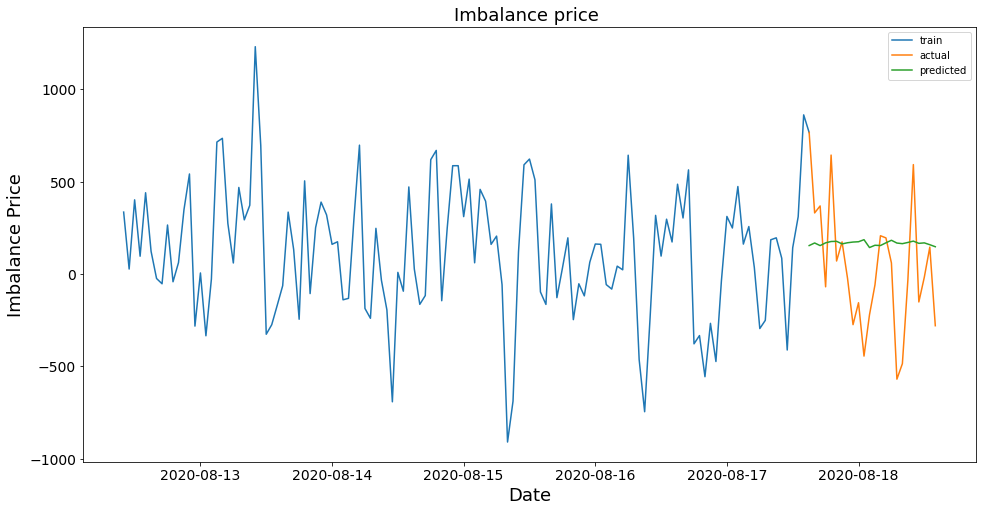

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(train_2019.iloc[-150:-24]['ds'], train_2019['y'].iloc[-150:-24], label='train')
plt.plot(forecast_1h_df['y'], label='actual')
plt.plot(forecast_1h_df['predicted'], label='predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Imbalance Price', fontsize=18)
plt.title('Imbalance price ', fontsize=18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14);
plt.legend()
plt.savefig('imb_price_train_test_arima_1h.png')

In [24]:
cmp = confusion_matrix(forecast_1h_df['class_act'], forecast_1h_df['class_pred'])

In [26]:
import seaborn as sns

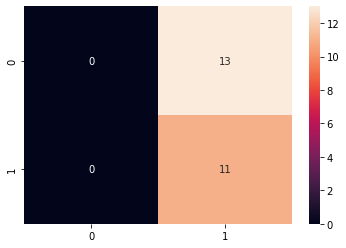

In [27]:
sns.heatmap(cmp, annot=True);

In [28]:
print(classification_report(forecast_1h_df['class_act'], forecast_1h_df['class_pred']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.46      1.00      0.63        11

    accuracy                           0.46        24
   macro avg       0.23      0.50      0.31        24
weighted avg       0.21      0.46      0.29        24



/Users/katrinmulinski/neuefische/capstone_energy/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katrinmulinski/neuefische/capstone_energy/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/katrinmulinski/neuefische/capstone_energy/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 